In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
train_path = "/kaggle/input/train-clean-1/train_clean_1.csv"

train_data = pd.read_csv(train_path)

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train_data.shape

(14204, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


# **Univariate Analysis**

**1. Summary statistics**

In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.759739,0.065953,141.004977,1997.830681,2181.288914
std,4.234851,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**2. Create Frequency Table**

> One-way frequency table using pandas.crosstab() method

In [7]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
pd.crosstab(train_data['Item_Identifier'], 'Item_Identifier_freq')

col_0,Item_Identifier_freq
Item_Identifier,
DRA12,9
DRA24,10
DRA59,10
DRB01,8
DRB13,9
...,...
NCZ30,10
NCZ41,8
NCZ42,10


In [9]:
pd.crosstab(train_data['Item_Weight'], 'Item_Weight_freq')

col_0,Item_Weight_freq
Item_Weight,
4.555,7
4.590,7
4.610,8
4.615,6
4.635,7
...,...
21.000,8
21.100,30
21.200,15


In [10]:
pd.crosstab(train_data['Item_Fat_Content'], 'Item_Fat_Content_freq')

col_0,Item_Fat_Content_freq
Item_Fat_Content,
LF,522
Low Fat,8485
Regular,4824
low fat,178
reg,195


In [11]:
pd.crosstab(train_data['Item_Visibility'], 'Item_Visibility_freq')

col_0,Item_Visibility_freq
Item_Visibility,
0.000000,879
0.003575,1
0.003589,1
0.003591,1
0.003592,1
...,...
0.313935,1
0.321115,1
0.323637,1


In [12]:
pd.crosstab(train_data['Item_Type'], 'Item_Type_freq')

col_0,Item_Type_freq
Item_Type,
Baking Goods,1086
Breads,416
Breakfast,186
Canned,1084
Dairy,1136
Frozen Foods,1426
Fruits and Vegetables,2013
Hard Drinks,362
Health and Hygiene,858


In [13]:
pd.crosstab(train_data['Item_MRP'], 'Item_MRP_freq')

col_0,Item_MRP_freq
Item_MRP,
31.2900,1
31.4900,1
31.8900,1
31.9558,2
31.9900,1
...,...
266.3226,1
266.4884,1
266.5884,3


In [14]:
pd.crosstab(train_data['Outlet_Identifier'], 'Outlet_Identifier_freq')

col_0,Outlet_Identifier_freq
Outlet_Identifier,
OUT010,925
OUT013,1553
OUT017,1543
OUT018,1546
OUT019,880
OUT027,1559
OUT035,1550
OUT045,1548
OUT046,1550


In [15]:
pd.crosstab(train_data['Outlet_Establishment_Year'], 'Outlet_Establishment_Year_freq')

col_0,Outlet_Establishment_Year_freq
Outlet_Establishment_Year,
1985,2439
1987,1553
1997,1550
1998,925
1999,1550
2002,1548
2004,1550
2007,1543
2009,1546


In [16]:
pd.crosstab(train_data['Outlet_Size'], 'Outlet_Size_freq')

col_0,Outlet_Size_freq
Outlet_Size,
High,1553
Medium,8671
Small,3980


In [17]:
pd.crosstab(train_data['Outlet_Location_Type'], 'Outlet_Location_Type_freq')

col_0,Outlet_Location_Type_freq
Outlet_Location_Type,
Tier 1,3980
Tier 2,4641
Tier 3,5583


In [18]:
pd.crosstab(train_data['Outlet_Type'], 'Outlet_Type_freq')

col_0,Outlet_Type_freq
Outlet_Type,
Grocery Store,1805
Supermarket Type1,9294
Supermarket Type2,1546
Supermarket Type3,1559


In [19]:
pd.crosstab(train_data['Item_Outlet_Sales'], 'Item_Outlet_Sales_freq')

col_0,Item_Outlet_Sales_freq
Item_Outlet_Sales,
33.2900,2
33.9558,1
34.6216,1
35.2874,1
36.6190,2
...,...
10306.5840,1
10993.6896,1
11445.1020,1


**3. Create Charts**

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

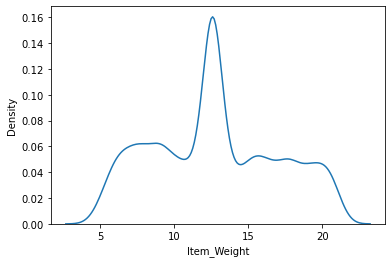

In [20]:
sns.kdeplot(train_data['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

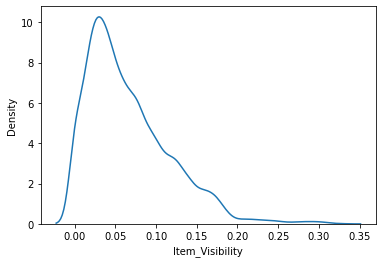

In [21]:
sns.kdeplot(train_data['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

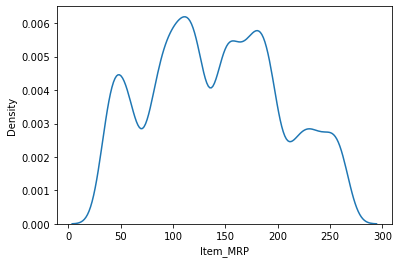

In [22]:
sns.kdeplot(train_data['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

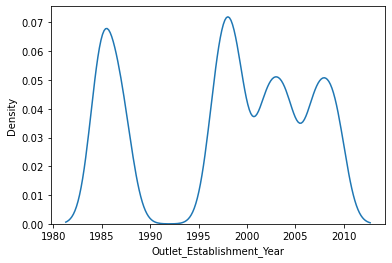

In [23]:
sns.kdeplot(train_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

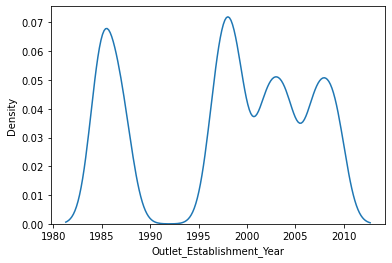

In [24]:
sns.kdeplot(train_data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

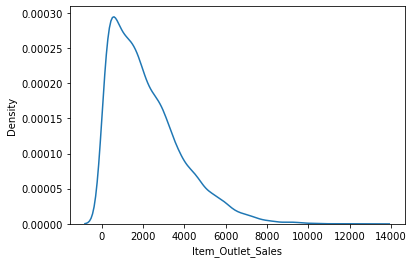

In [25]:
sns.kdeplot(train_data['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Item_Outlet_Sales'>

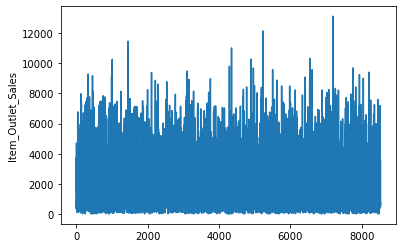

In [26]:
sns.lineplot(data= train_data['Item_Outlet_Sales'])

# **Bivariate Analysis**

**1. Scatterplots**

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

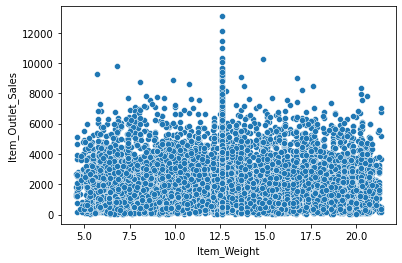

In [27]:
sns.scatterplot(x=train_data['Item_Weight'], y=train_data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

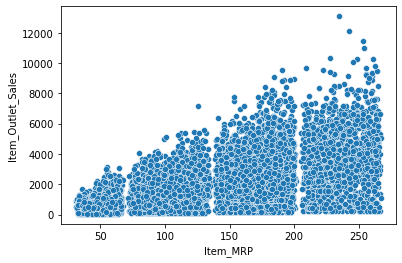

In [28]:
sns.scatterplot(x=train_data['Item_MRP'], y=train_data['Item_Outlet_Sales'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 51.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

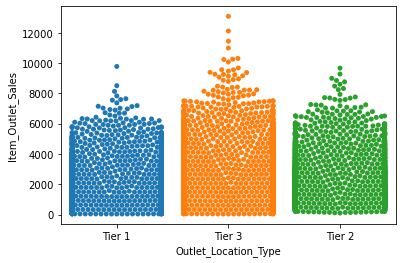

In [29]:
sns.swarmplot(x = train_data['Outlet_Location_Type'],y = train_data['Item_Outlet_Sales'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

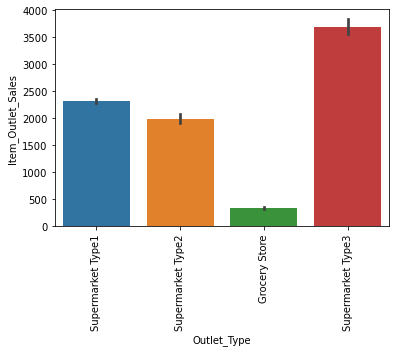

In [30]:
sns.barplot(x=train_data['Outlet_Type'], y=train_data['Item_Outlet_Sales'])
plt.xticks(rotation=90)

**2. Correlation Coefficients**

In [31]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015366,0.033008,0.012448,0.009693
Item_Visibility,-0.015366,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.033008,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.012448,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

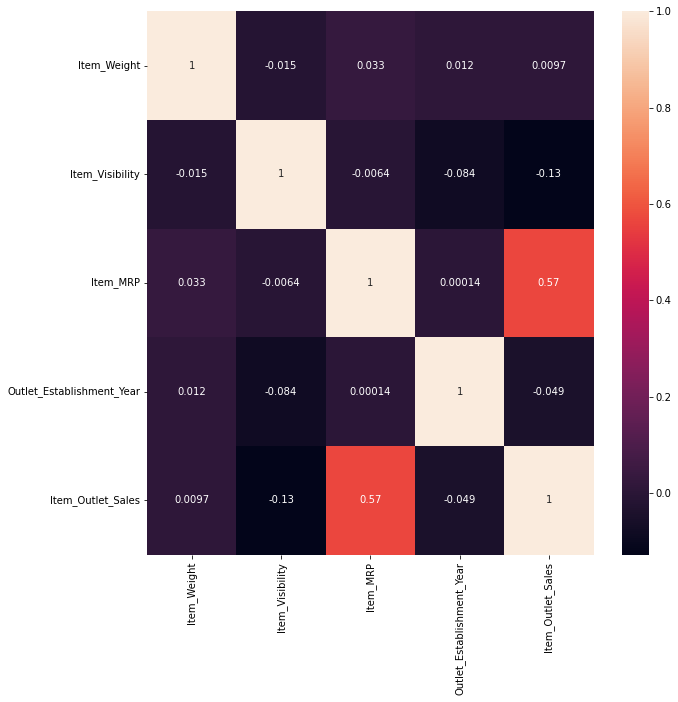

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(),annot = True)